This script will attempt to process and plot echosounder and amplitude data as a means of understanding sediment characteristics.

In [2]:
### Code to read in h5 files as detailed in the first guidebook
# Import necessary packages
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [3]:
deployment_num = 1
sensor_id = "E1_103071"
#directory_initial_user_path = r"/Volumes/BOEM/"  # Katherine
# directory_initial_user_path = r"/Volumes/kanarde/BOEM/"  # Brooke
directory_initial_user_path = r"Z:/"  # Levi

In [4]:
# Create dictionary for each sensor
dirpath=os.path.join(directory_initial_user_path, f"deployment_{deployment_num}/Raw/",f"{sensor_id}_hdf",'Group05')  # path to the directory containing the h5 files
files = os.listdir(dirpath) # list of files for the sensor
Data = {}
for file in files:
    file_path = os.path.join(dirpath, file)  # file path
    df = pd.read_hdf(file_path)  # read the file into a Pandas dataframe
    file_name = file.split('.')[0]  # file name 
    print(file_name)
    Data[file_name] = df  # store dataframe
globals()[f"Data_{sensor_id}"] = Data

Burst_NCells
Burst_CellSize
EchoBlankingDistance
EchoCellSize
EchoFrequency
Beam2xyz
EchoTransmitLength
Burst_SampleRate
Burst_VelBeam
Burst_VertAmplitude
Burst_CorBeam
Burst_AmpBeam
Burst_Time
Burst_Pressure
Burst_Heading
Burst_Pitch
Burst_Roll
Echo1
Echo2


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

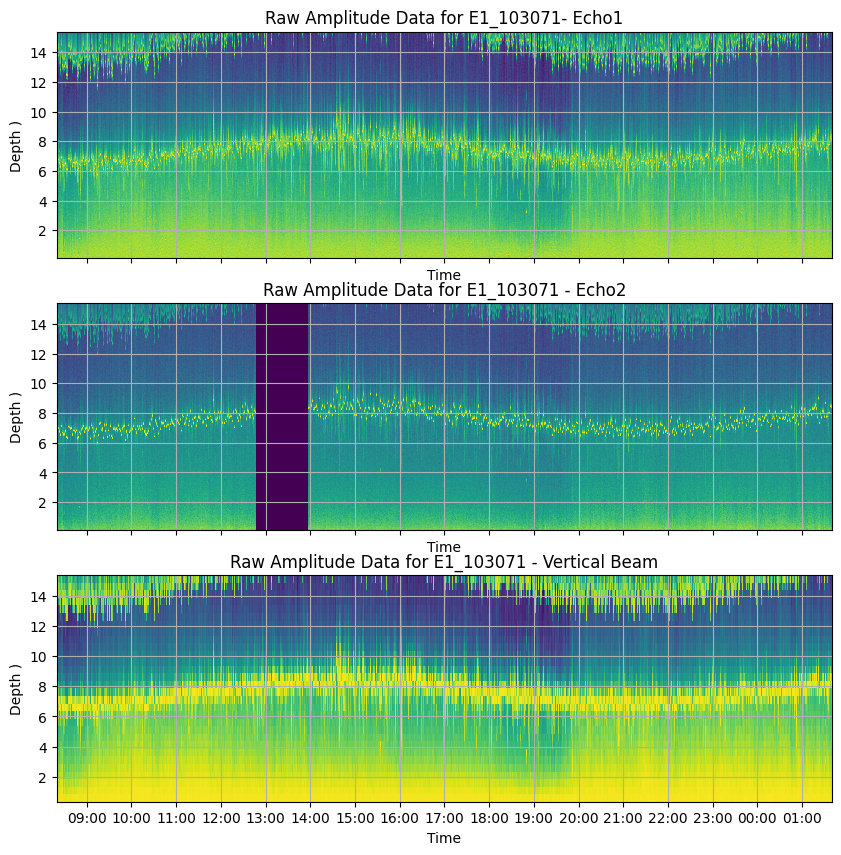

In [ ]:
#Plot the raw amplitude Data and make the required cell depth vectors
# Create cell depth vector
vector = np.arange(1, Data["Burst_NCells"][0][0] + 1)

# Calculate the depth of each cell
Data["CellDepth"] = (
        Data["EchoBlankingDistance"][0].iloc[0]
        + vector * Data["Burst_CellSize"][0].iloc[0]
)

#Create echo cell depth vector
Data['EchoNCells'] = Data['Echo1'].shape[1]  # Number of echo cells
# Create cell depth vector for echoes
vector = np.arange(1, Data["EchoNCells"] + 1)

# Calculate the depth of each cell
Data["CellDepth_echo"] = (
        Data["EchoBlankingDistance"][0].iloc[0]
        + vector * Data["EchoCellSize"][0].iloc[0])

# Plot the raw amplitude data for Echo1 and Echo2 and the Vertical Beam using meshgrids
#Echo1 and Echo2 have shapes [Sample,Cells] and Vertical Beam has shape [Sample,Cells] where the Echo cell depth maps the depths of each cell for the echoes, whilw the Vertical Beam uses normal cell depth
fig, (axs1,axs2,axs3)  = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs1.pcolormesh(
    Data["Burst_Time"][0],
    Data["CellDepth_echo"],
    Data["Echo1"].T,
    shading="auto",
    cmap="viridis",
)
axs1.set_title(f"Raw Amplitude Data for {sensor_id}- Echo1")
axs2.pcolormesh(
    Data["Burst_Time"][0],
    Data["CellDepth_echo"],
    Data["Echo2"].T,
    shading="auto",
    cmap="viridis",
)
axs2.set_title(f"Raw Amplitude Data for {sensor_id} - Echo2")
axs3.pcolormesh(
    Data["Burst_Time"][0],
    Data["CellDepth"],
    Data["Burst_VertAmplitude"].T,
    shading="auto",
    cmap="viridis",
)
axs3.set_title(f"Raw Amplitude Data for {sensor_id} - Vertical Beam")

for axs in [axs1,axs2,axs3]:
        axs.xaxis.set_major_locator(mdates.HourLocator(interval=1))
        axs.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        axs.set_xlabel("Time")
        axs.set_ylabel("Depth")
        axs.grid(True)
plt.tight_layout()
plt.savefig(f"C:\\Users\\lwlav\\OneDrive\\Documents\\Summer 2024 CHAZ\\Figures\\{sensor_id}_raw_amplitude_data.png")